Use the k-nearest neighbor classifier or regressor to predict the same categorical or quantitative variable that you predicted in Milestone 6 and 7. You should split your data into training and testing data for this milestone.
- Use the testing data to make predictions and assess your model. If classifying, compute the confusion matrix and at least two of sensitivity, specificity, precision, or accuracy. If regressing, compute the mean squared error and plot the actual value (x axis) vs. the error or predicted value (y axis).
- Write a few sentences on your webpage summarizing the model (what does it appear to be basing its decisions on) and how well it performs.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import folium

from sklearn.preprocessing import MinMaxScaler
    
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import confusion_matrix

from sklearn import tree
import graphviz
from graphviz import Source
 
from sklearn.tree import export_graphviz

%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
cars = pd.read_csv("e_9-5-2019-no-sales-_9_4_2019public.csv")
c = ['Division','Mfr Name', 'Carline', '# Cyl', 'Transmission',\
     'City FE (Guide) - Conventional Fuel',\
     'Hwy FE (Guide) - Conventional Fuel', 'Comb FE (Guide) - Conventional Fuel',\
     'Drive Desc', 'City CO2 Rounded Adjusted', 'FE Rating (1-10 rating on Label)',\
    'Annual Fuel1 Cost - Conventional Fuel'
    ]
cars = pd.read_csv("e_9-5-2019-no-sales-_9_4_2019public.csv", usecols = c)

cars.head(5)

,Mfr Name,Division,Carline,# Cyl,Transmission,City FE (Guide) - Conventional Fuel,Hwy FE (Guide) - Conventional Fuel,Comb FE (Guide) - Conventional Fuel,Drive Desc,Annual Fuel1 Cost - Conventional Fuel,FE Rating (1-10 rating on Label),City CO2 Rounded Adjusted
0,Honda,Acura,NSX,6,Auto(AM-S9),21,22,21,All Wheel Drive,2150,4,419
1,FCA US LLC,ALFA ROMEO,4C,4,Auto(AM6),24,34,28,"2-Wheel Drive, Rear",1600,6,365
2,aston martin,Aston Martin Lagonda Ltd,Vantage V8,8,Auto(S8),18,25,21,"2-Wheel Drive, Rear",2150,4,494
3,Volkswagen Group of,Audi,TT Roadster quattro,4,Auto(AM-S7),23,31,26,All Wheel Drive,1450,5,384
4,BMW,BMW,Z4 sDrive30i,4,Auto(S8),25,32,28,"2-Wheel Drive, Rear",1600,6,355


In [3]:
X = cars.iloc[:,[5]]
X.head()

,City FE (Guide) - Conventional Fuel
0,21
1,24
2,18
3,23
4,25


In [4]:
y = cars["Annual Fuel1 Cost - Conventional Fuel"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Use the training data to train a k-nearest neighbors regressor with k = 3 to predict the annual fuel cost for the test data.

In [6]:
knn = KNeighborsRegressor(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [7]:
((y_test - y_pred)**2).mean()

30157.627865961185

In [13]:
knn_6 = KNeighborsRegressor(n_neighbors = 6)
knn_6.fit(X_train, y_train)
y_pred_6 = knn_6.predict(X_test)

((y_test - y_pred_6)**2).mean()

26409.832451499107

Using k-nearest neighbors with k = 3, the mean square error is: 27993.827160493805; which is lower than using a decision tree with depth 3.

In [8]:
knn_mses = []
for k in range(1,21):
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = ((y_test - y_pred)**2).mean()
    knn_mses.append(mse)

Text(0, 0.5, 'Mean Squared Error')

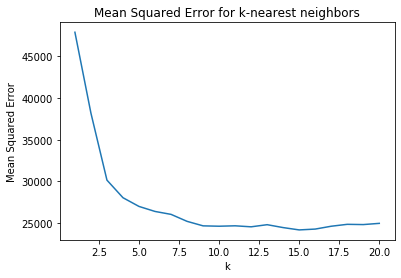

In [9]:
plt.plot(range(1,21),knn_mses)
plt.title("Mean Squared Error for k-nearest neighbors")
plt.xlabel("k")
plt.ylabel("Mean Squared Error")

In [10]:
knn_mses

[47867.06349206349,
 38177.083333333336,
 30157.627865961185,
 28053.075396825396,
 27010.31746031746,
 26409.832451499107,
 26060.09070294783,
 25224.91939484127,
 24684.866745051942,
 24641.071428571428,
 24690.49258821987,
 24569.89914021163,
 24824.01145862685,
 24476.534661483634,
 24198.41269841269,
 24298.69636656746,
 24639.046795188657,
 24867.72486772485,
 24838.027085257,
 24983.010912698413]

k = 6, will give me the lowest mean square error

Text(0, 0.5, 'Predicted value - Annual cost')

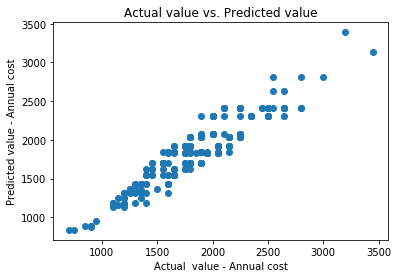

In [11]:
plt.scatter(y_test , y_pred)
plt.title('Actual value vs. Predicted value')
plt.xlabel('Actual  value - Annual cost')
plt.ylabel('Predicted value - Annual cost')

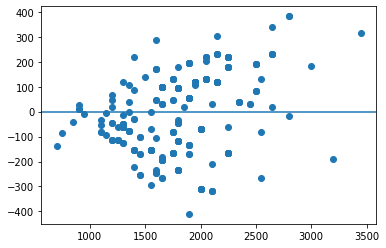

In [12]:
# plt.scatter(y_test , y_pred)
# plt.title('Actual value vs. Predicted value')
# plt.xlabel('Actual  value - Annual cost')
# plt.ylabel('Predicted value - Annual cost')

plt.scatter(y_test, y_test - y_pred)
plt.axhline()